In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 100) # Setting pandas dataframe display width to N
import matplotlib.pyplot as plt # plotting library
from src.utils import import_data, categorial_feature_overview, preprocess
import ppscore as pps # importing ppscore
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [8]:
file = "usersessions/train.json"


df = pd.read_json(file)


In [9]:
df["is_joe"] = df["user_id"].apply(lambda x: 1 if x == 0 else 1)


In [10]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X = df.drop("is_joe", axis=1)
y = df["is_joe"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

X_test.to_csv("val.csv", index=False)


X_train["is_joe"] = y_train
X_test["is_joe"] = y_test


/var/folders/0t/f5gvtkrj25701fwkx93kg95m0000gn/T/ipykernel_74974/2715007624.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["is_joe"] = y_train
/var/folders/0t/f5gvtkrj25701fwkx93kg95m0000gn/T/ipykernel_74974/2715007624.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["is_joe"] = y_test


In [20]:
X_test.to_pickle("val.pkl")

In [10]:
df = X_train.copy()
df = preprocess(df)


In [11]:
(df.is_joe == 1).sum() / len(df) * 100


0.48823529411764705

<AxesSubplot:>

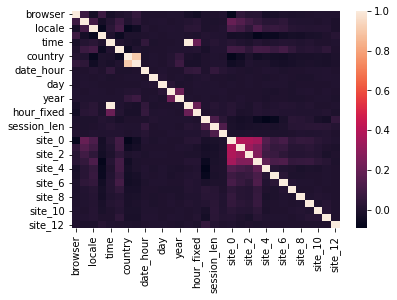

In [12]:
sns.heatmap(
    df.apply(lambda x: pd.factorize(x)[0]).corr(method="pearson", min_periods=1)
)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 

<AxesSubplot:xlabel='x', ylabel='y'>

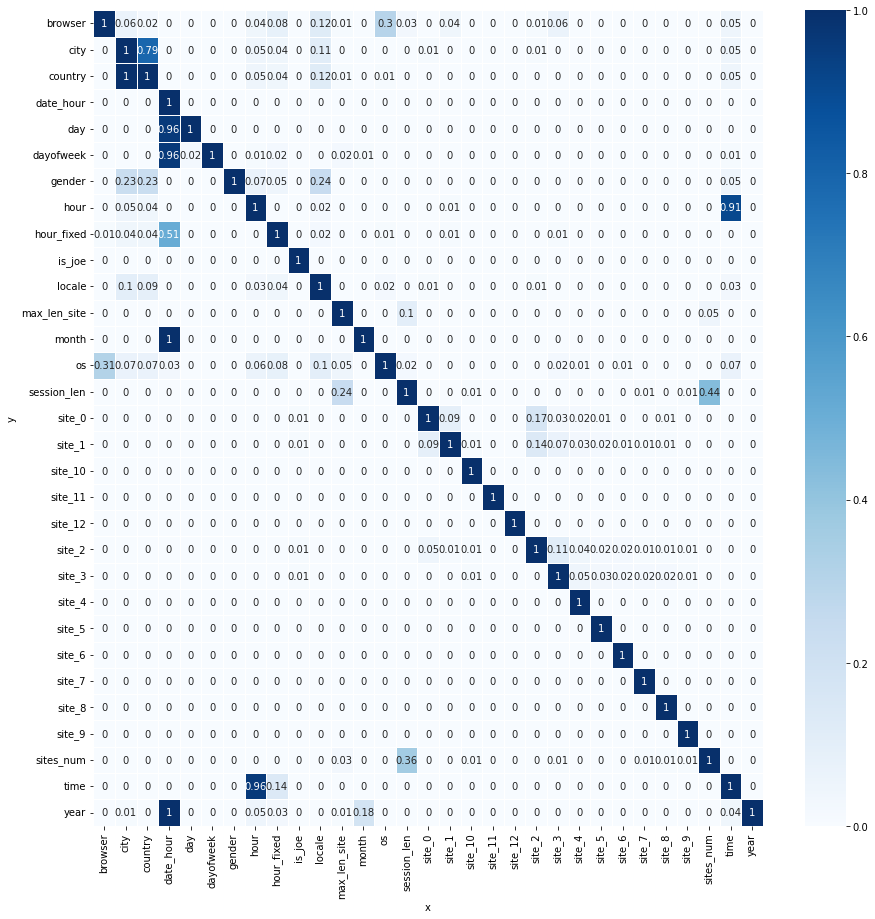

In [6]:
matrix_df = pps.matrix(df)[["x", "y", "ppscore"]].pivot(
    columns="x", index="y", values="ppscore"
)
matrix_df = matrix_df.apply(
    lambda x: round(x, 2)
)  # Rounding matrix_df's values to 0,XX
_, ax = plt.subplots(figsize=(15, 15))  # Sample figsize in inches


sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True, ax=ax)


PPS matrix presents non-linear relationships between variables.

- High value for relationship between location and both, city and country.
- Relatively high value between os and browser.
- High value between sites_num and session_len


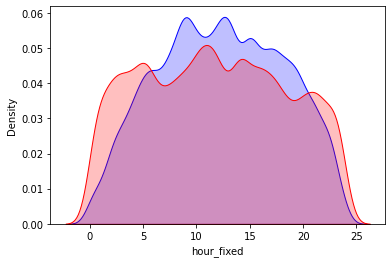

In [13]:
sns.kdeplot(df["hour_fixed"], shade=1, color="blue")
sns.kdeplot(df["hour"], shade=1, color="red")
plt.show()


fixing timezones drastically changed distribution of hours.


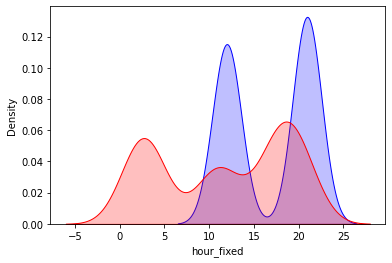

In [14]:
sns.kdeplot(x=df[df["is_joe"] == 1]["hour_fixed"], shade=1, color="blue")
sns.kdeplot(x=df[df["is_joe"] == 1]["hour"], shade=1, color="red")
plt.show()


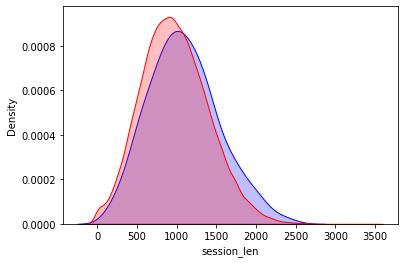

In [15]:
sns.kdeplot(x=df[df["is_joe"] == 1]["session_len"], shade=1, color="blue")
sns.kdeplot(x=df[df["is_joe"] == 0]["session_len"], shade=1, color="red")
plt.show()


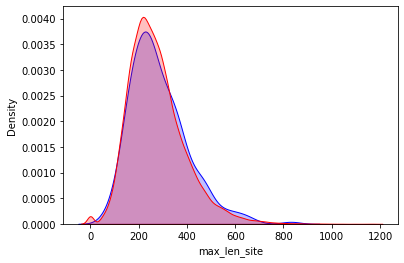

In [16]:
sns.kdeplot(x=df[df["is_joe"] == 1]["max_len_site"], shade=1, color="blue")
sns.kdeplot(x=df[df["is_joe"] == 0]["max_len_site"], shade=1, color="red")
plt.show()


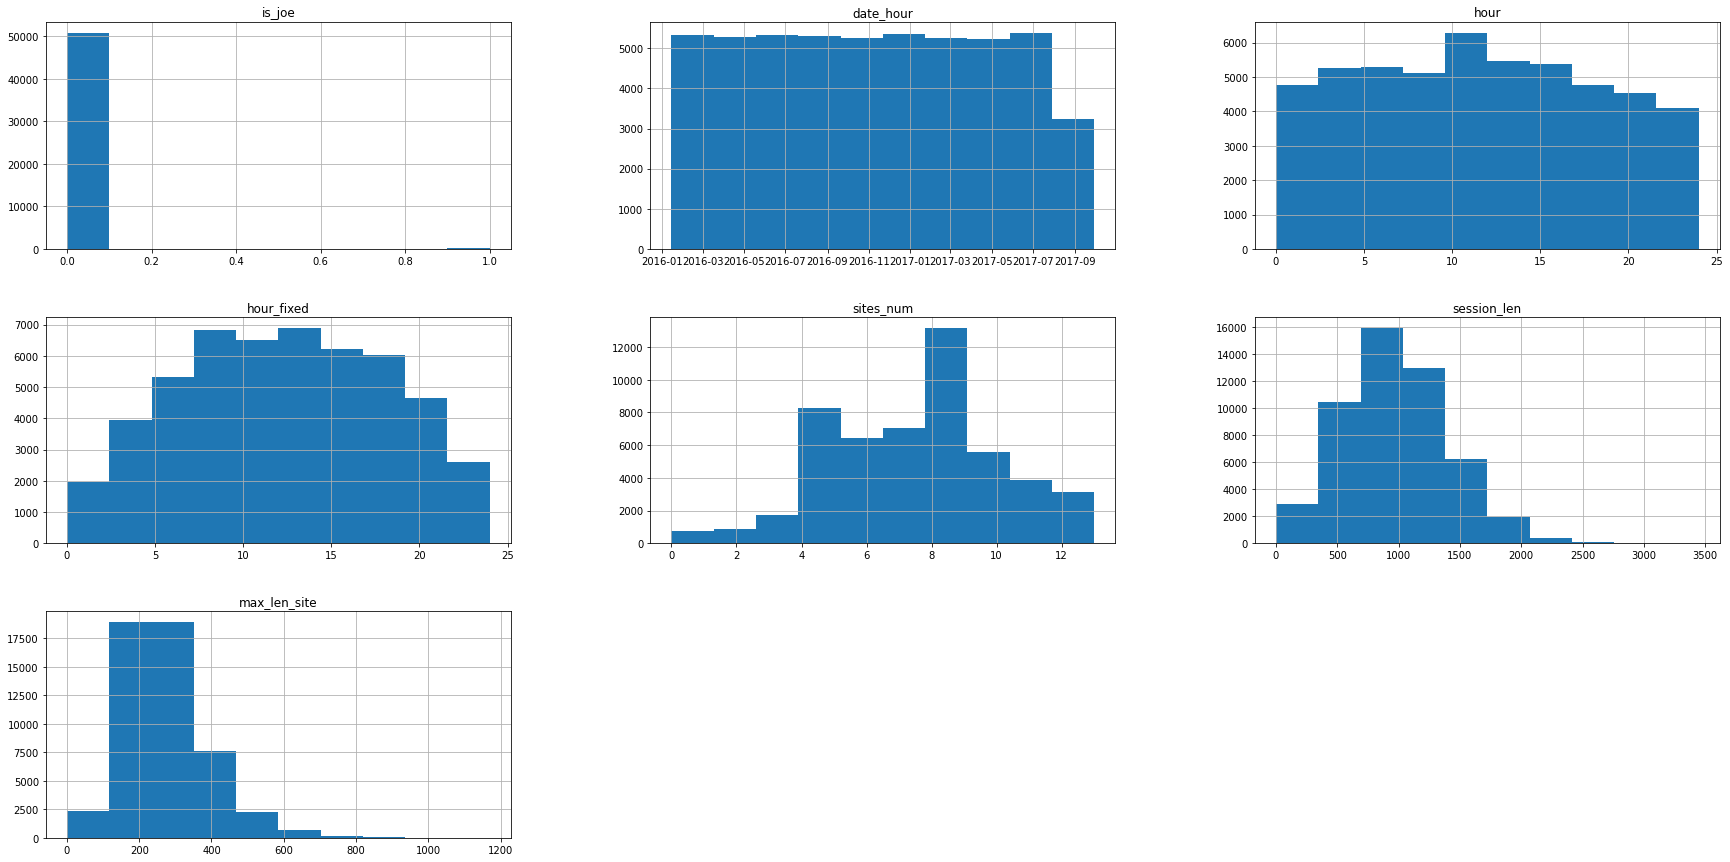

In [17]:
df.hist(figsize=(30, 15))
plt.show()


In [18]:
cont_cols = df.select_dtypes(include=[np.number]).columns
cont_cols


Index(['is_joe', 'hour', 'hour_fixed', 'sites_num', 'session_len', 'max_len_site'], dtype='object')

In [19]:
data = pd.melt(df, value_vars=cont_cols)
data.head()


,variable,value
0,is_joe,0.0
1,is_joe,0.0
2,is_joe,0.0
3,is_joe,0.0
4,is_joe,0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

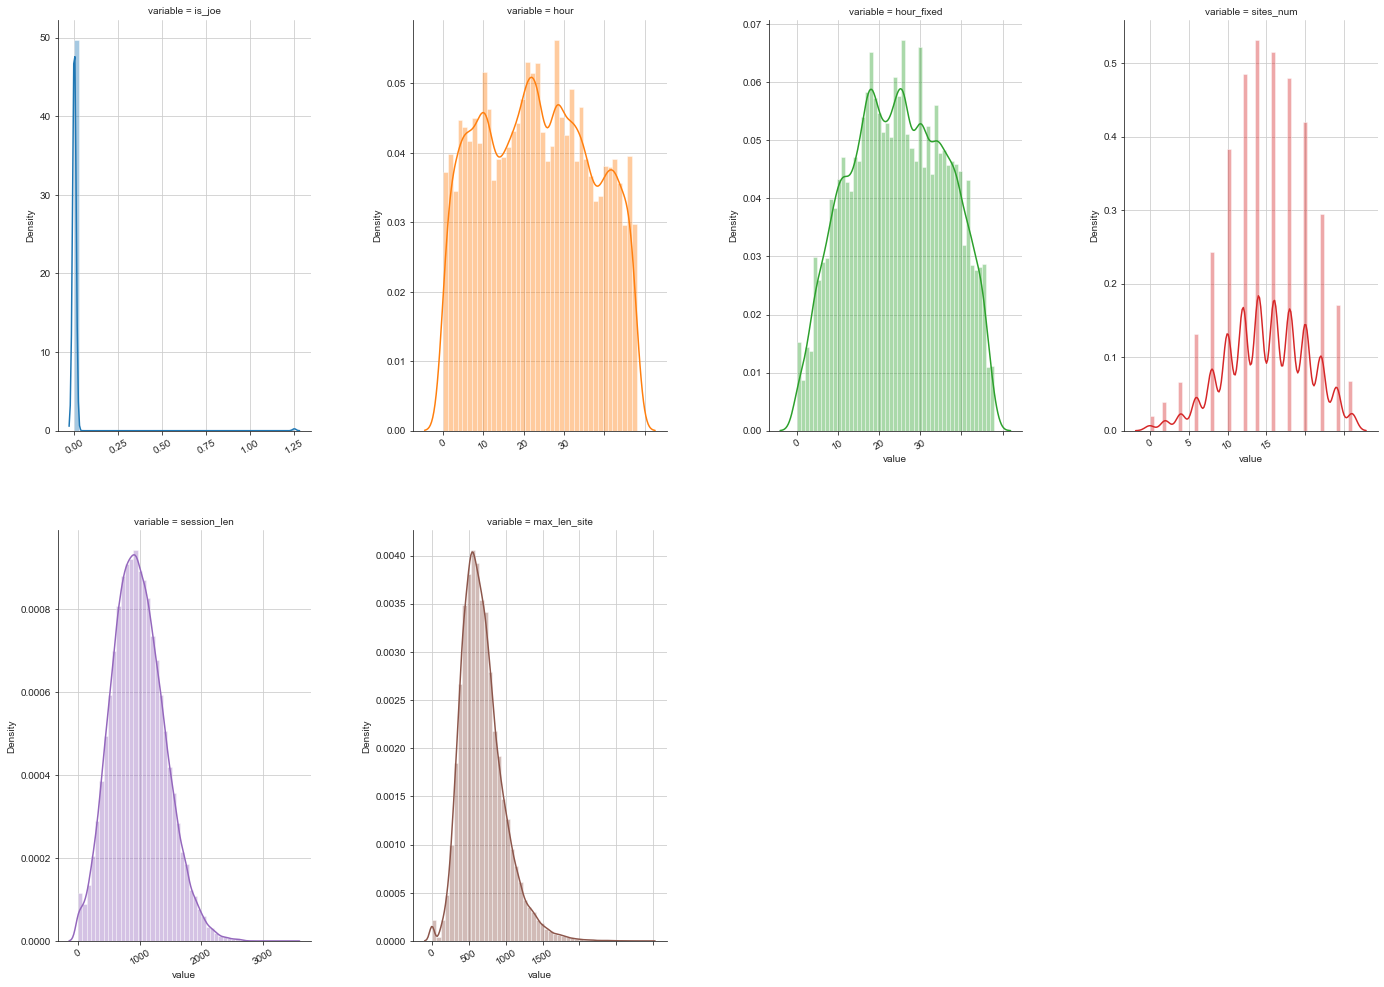

In [20]:
# Using col_wrap - we have one row. Plotting all continous numerical cols
sns.set_style("ticks", {"axes.grid": True})
plots = sns.FacetGrid(
    data, col="variable", col_wrap=4, sharex=False, sharey=False, hue="variable"
)
plots = plots.map(sns.distplot, "value")
for axes in plots.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
plt.gcf().set_size_inches(20, 15)


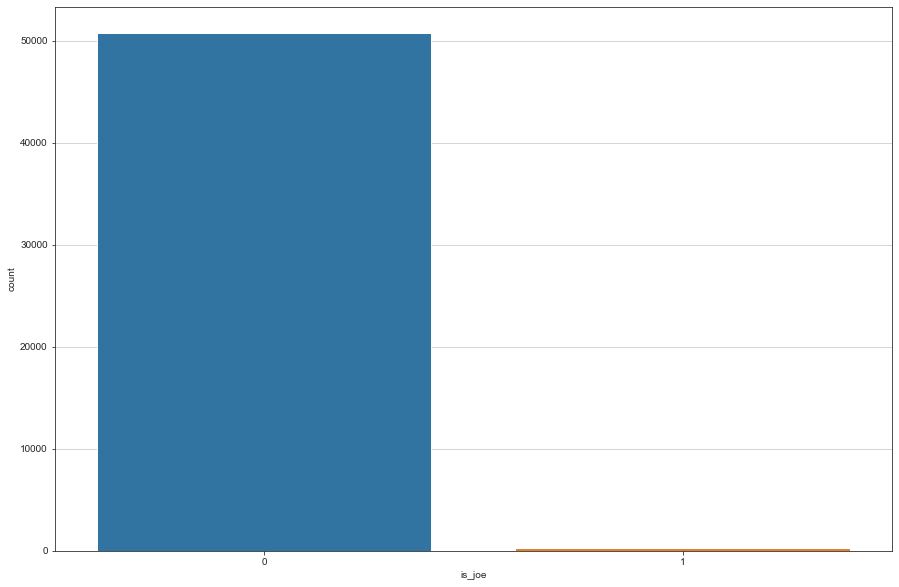

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df, x="is_joe")
plt.show()


In [22]:
cat_cols = df.select_dtypes(object).columns
joe = df[df["is_joe"] == 1]


<AxesSubplot:xlabel='locale', ylabel='count'>

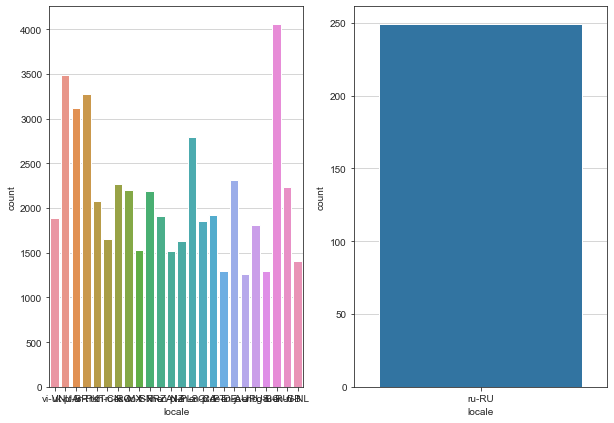

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="locale", ax=ax[0])
sns.countplot(data=joe, x="locale", ax=ax[1])


<AxesSubplot:xlabel='browser', ylabel='count'>

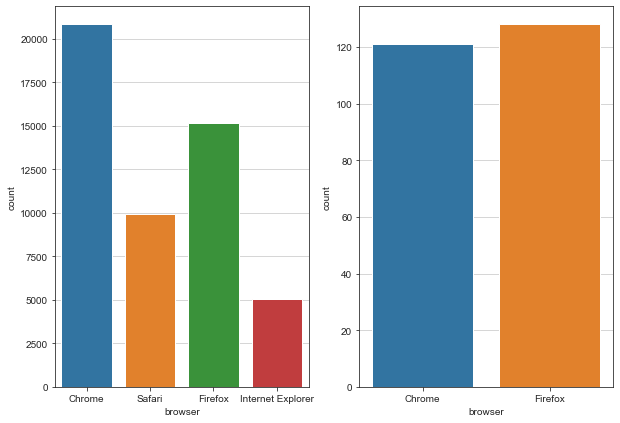

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="browser", ax=ax[0])
sns.countplot(data=joe, x="browser", ax=ax[1])


<AxesSubplot:xlabel='gender', ylabel='count'>

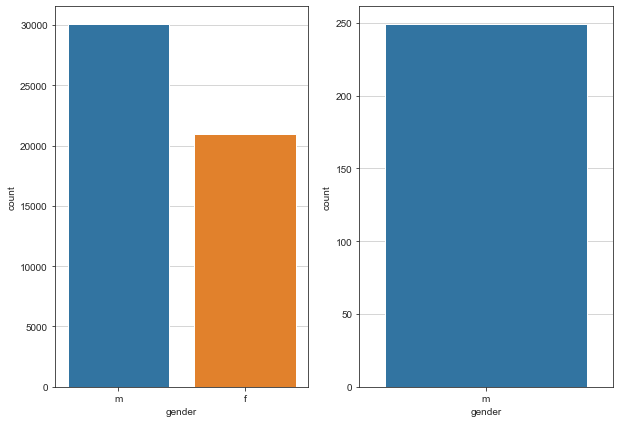

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="gender", ax=ax[0])
sns.countplot(data=joe, x="gender", ax=ax[1])


<AxesSubplot:xlabel='os', ylabel='count'>

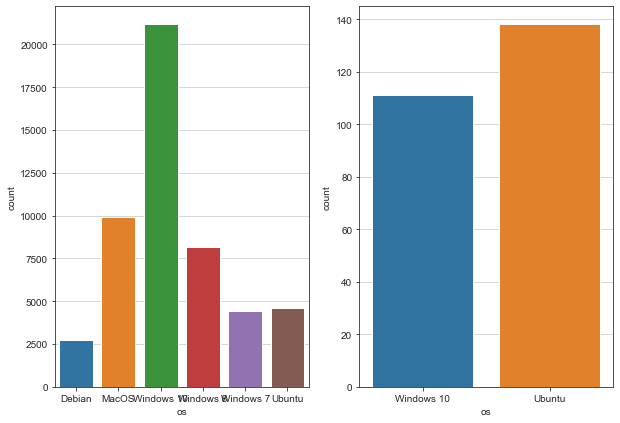

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="os", ax=ax[0])
sns.countplot(data=joe, x="os", ax=ax[1])


<AxesSubplot:xlabel='country', ylabel='count'>

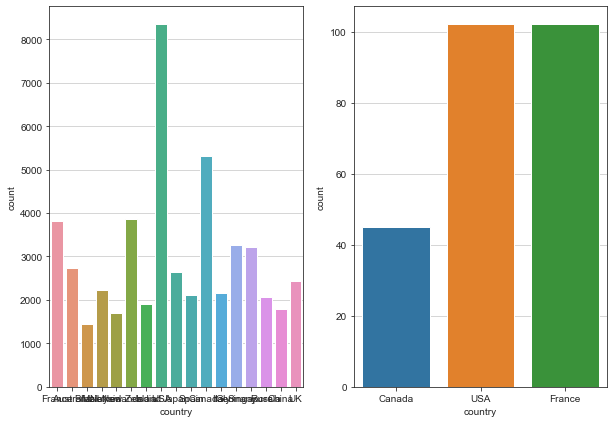

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="country", ax=ax[0])
sns.countplot(data=joe, x="country", ax=ax[1])


<AxesSubplot:xlabel='dayofweek', ylabel='count'>

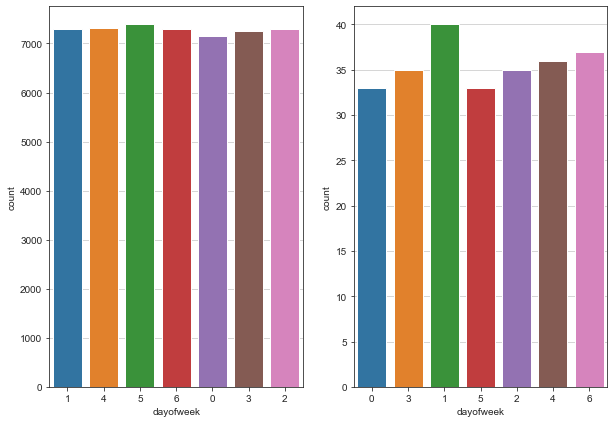

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="dayofweek", ax=ax[0])
sns.countplot(data=joe, x="dayofweek", ax=ax[1])


<AxesSubplot:xlabel='year', ylabel='count'>

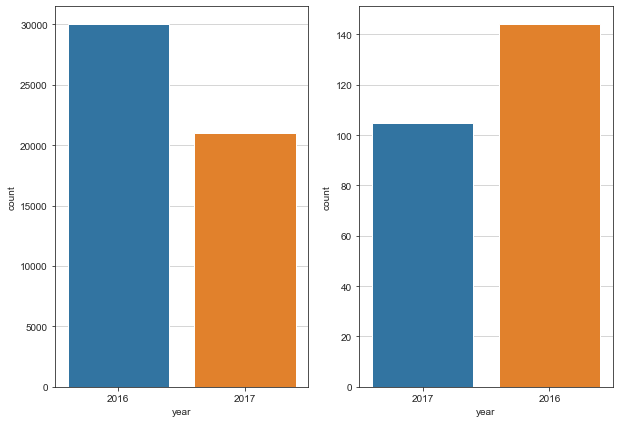

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x="year", ax=ax[0])
sns.countplot(data=joe, x="year", ax=ax[1])


In [30]:
cat_cols


Index(['browser', 'os', 'locale', 'gender', 'time', 'country', 'city', 'dayofweek', 'day', 'month',
       'year', 'site_0', 'site_1', 'site_2', 'site_3', 'site_4', 'site_5', 'site_6', 'site_7',
       'site_8', 'site_9', 'site_10', 'site_11', 'site_12'],
      dtype='object')

browser has 0.0 % of null values


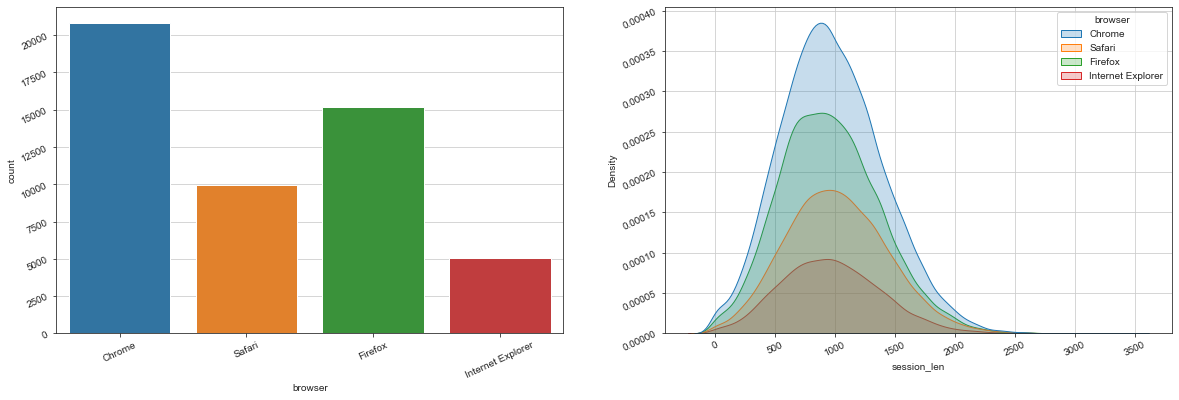

os has 0.0 % of null values


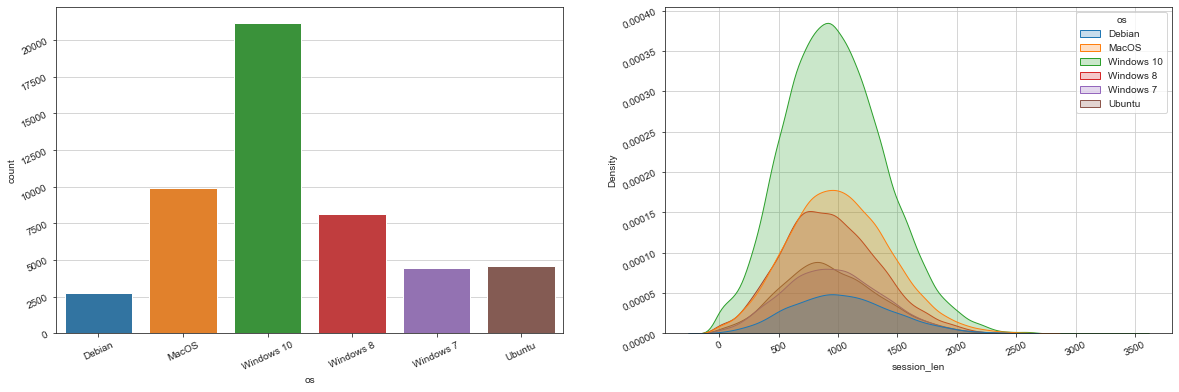

locale has 0.0 % of null values


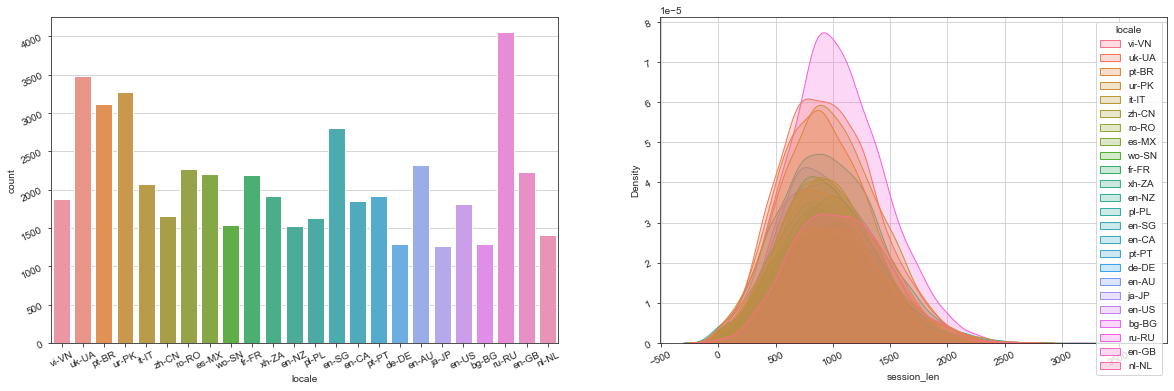

gender has 0.0 % of null values


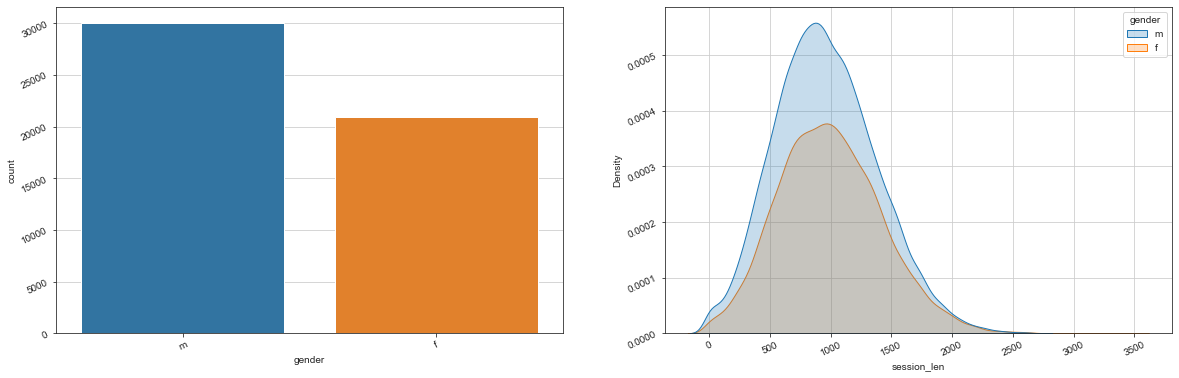

country has 0.0 % of null values


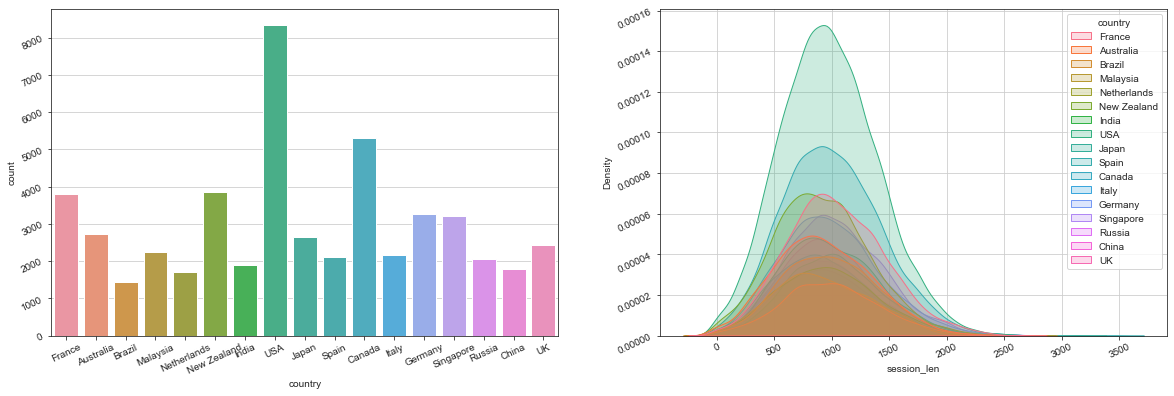

city has 0.0 % of null values


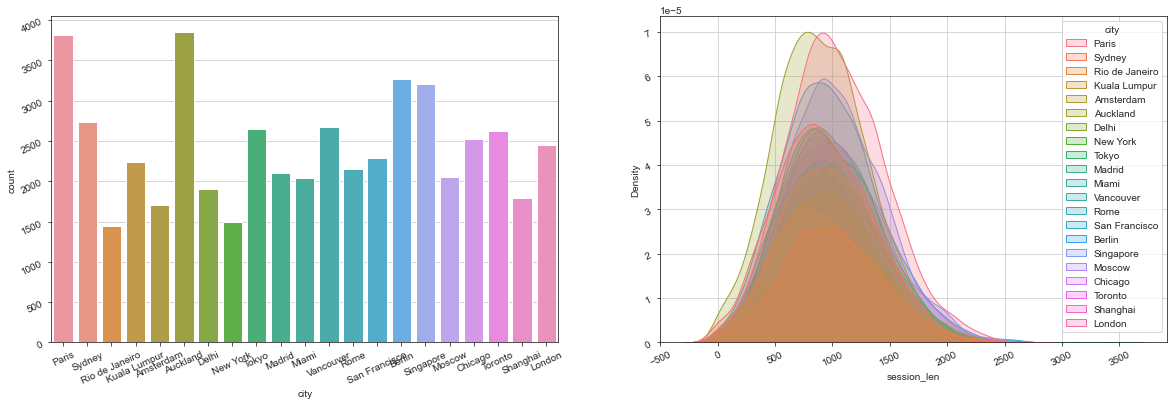

dayofweek has 0.0 % of null values


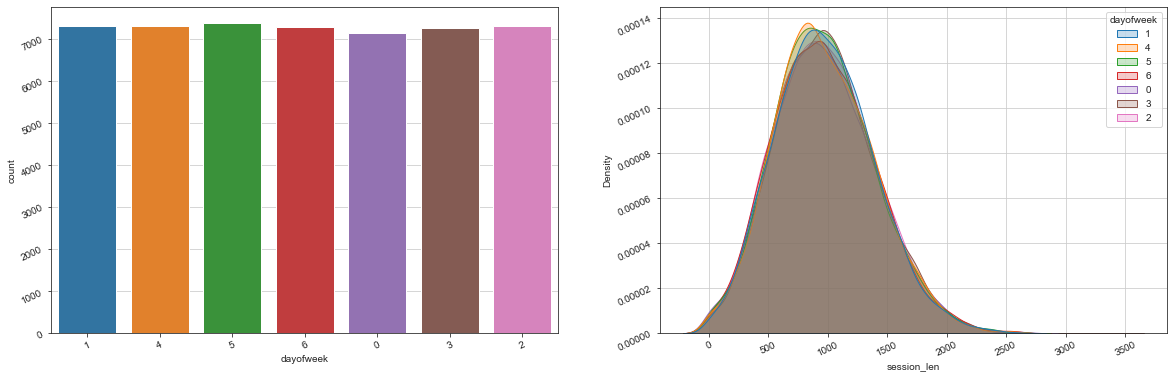

day has 0.0 % of null values


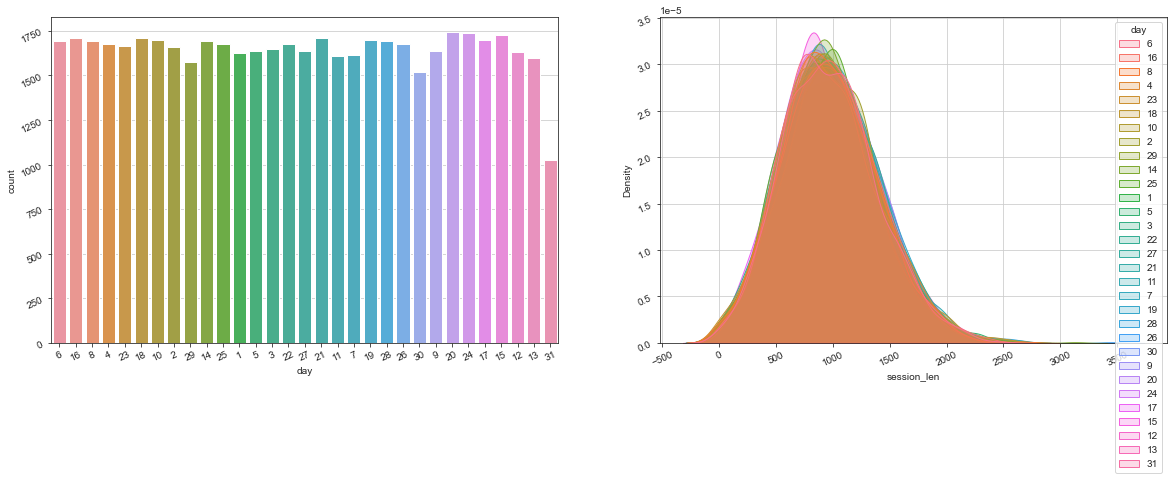

month has 0.0 % of null values


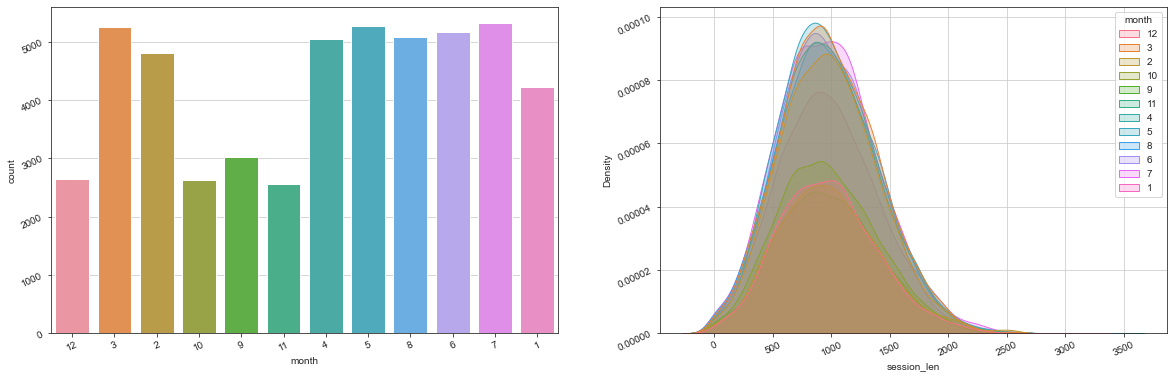

year has 0.0 % of null values


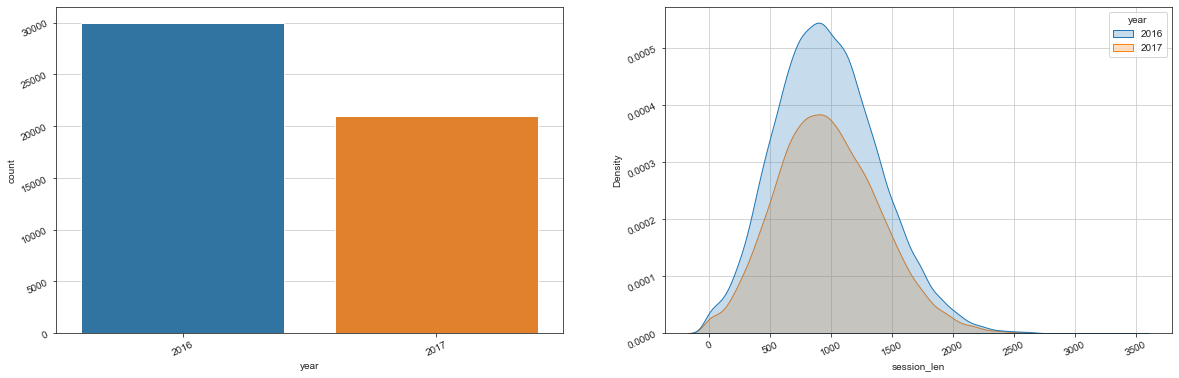

site_0 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


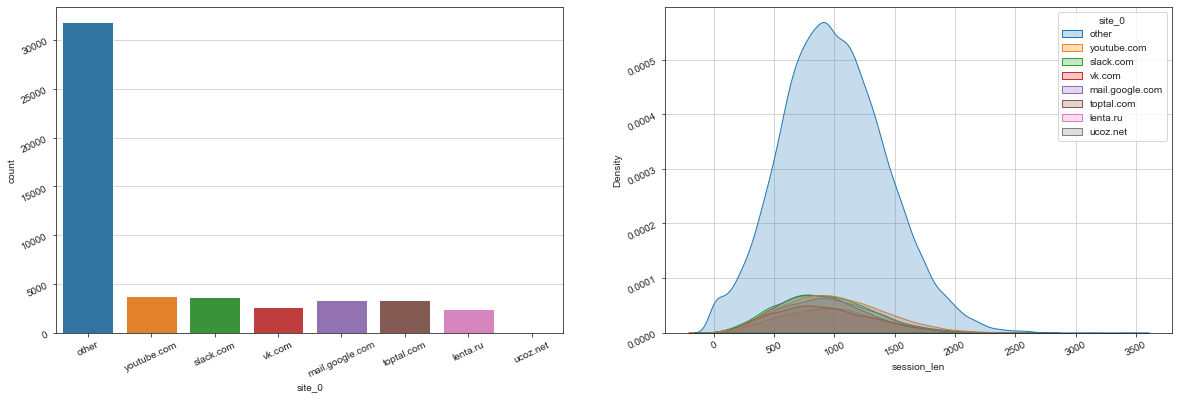

site_1 has 0.0 % of null values


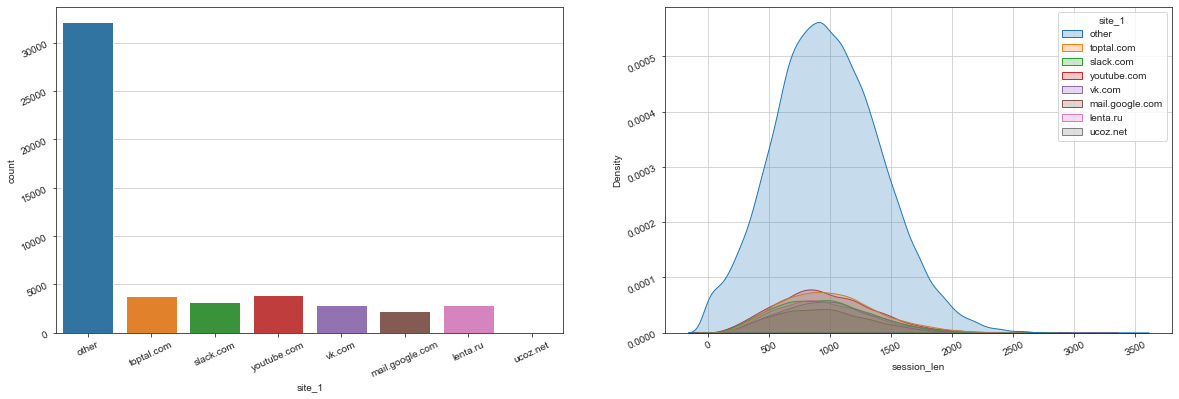

site_2 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


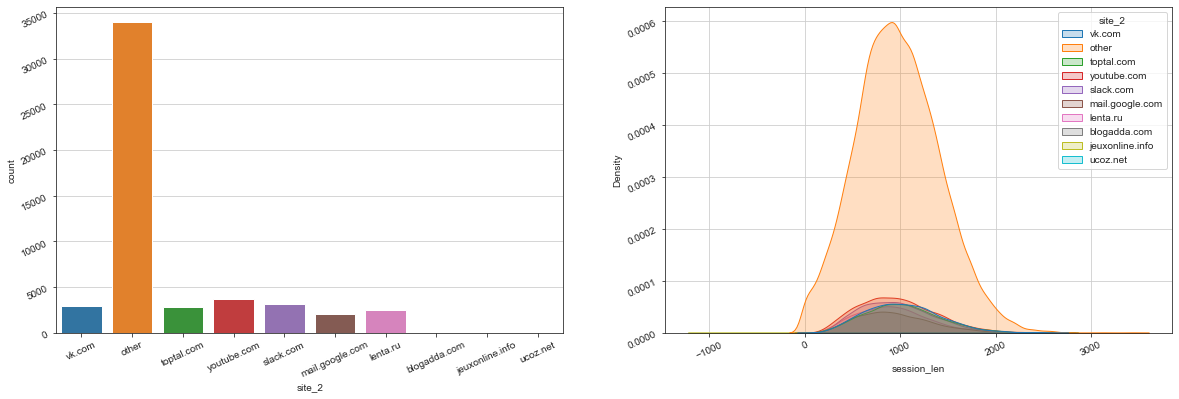

site_3 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


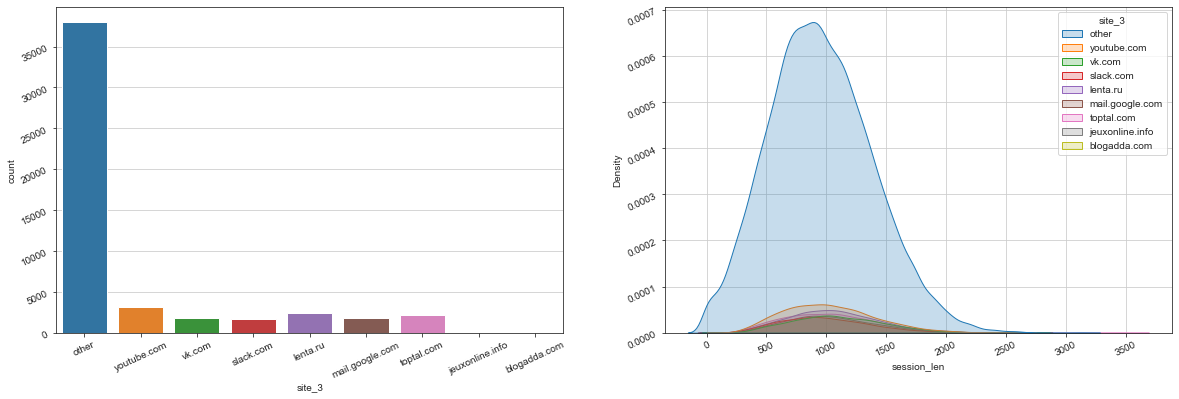

site_4 has 0.0 % of null values


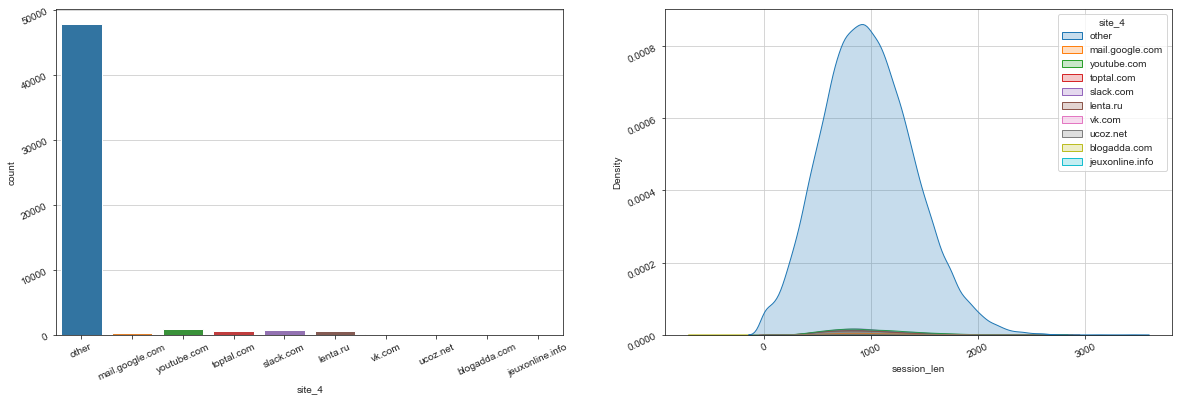

site_5 has 0.0 % of null values


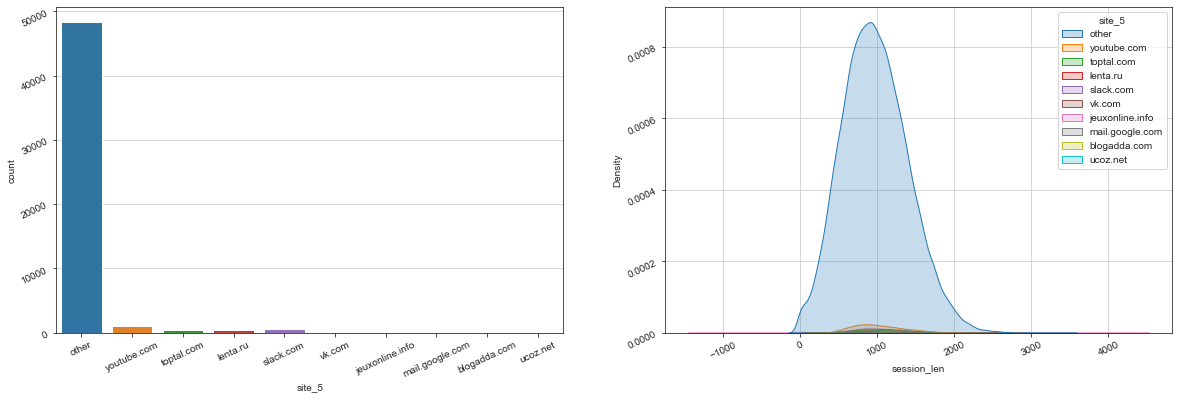

site_6 has 0.0 % of null values


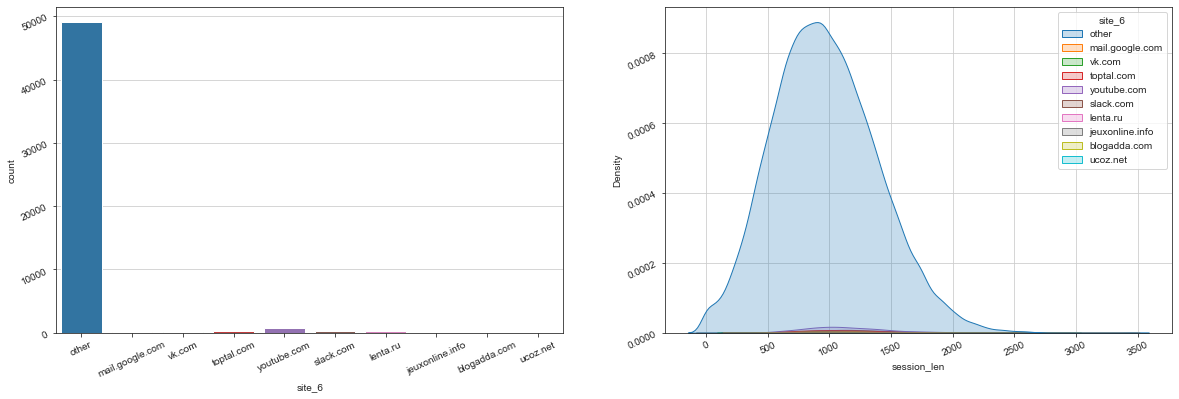

site_7 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


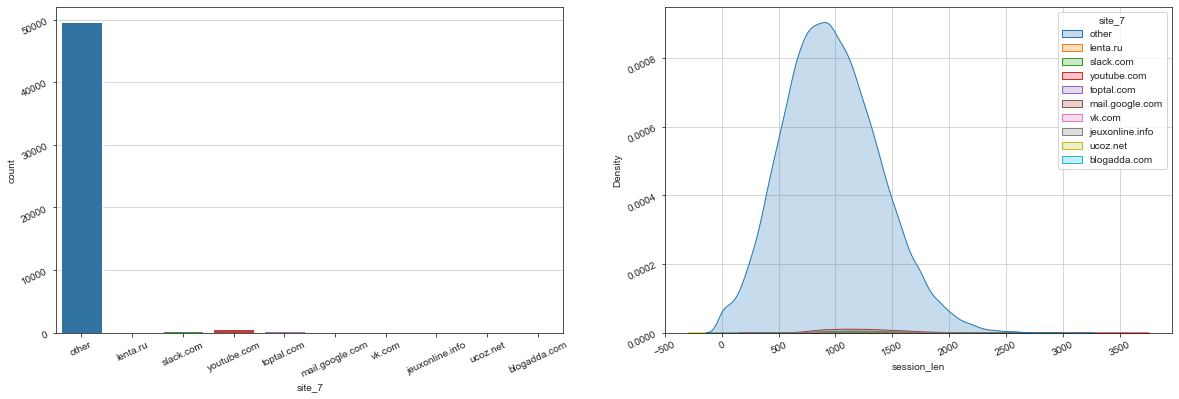

site_8 has 0.0 % of null values


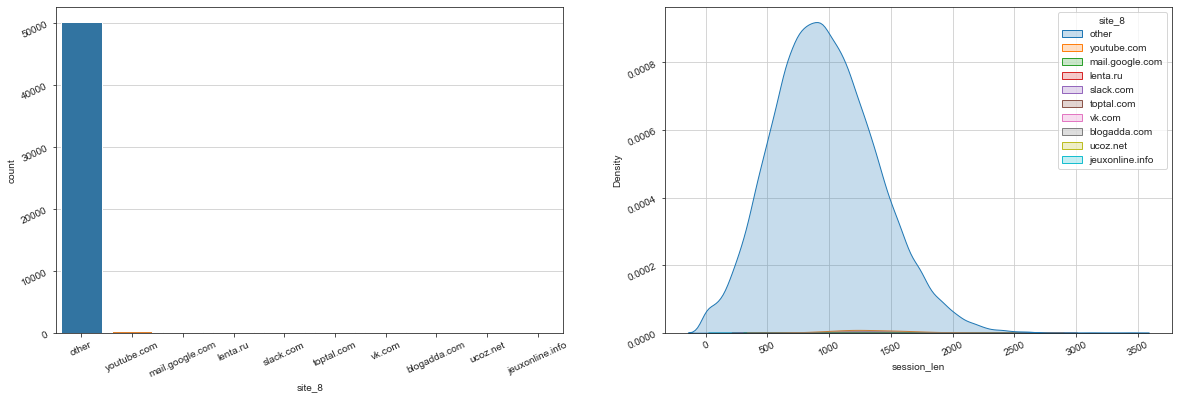

site_9 has 0.0 % of null values


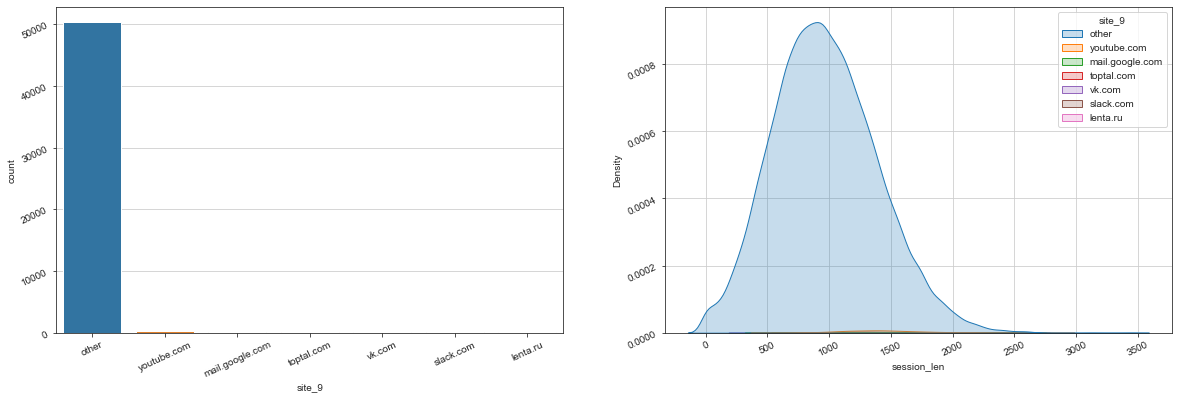

site_10 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


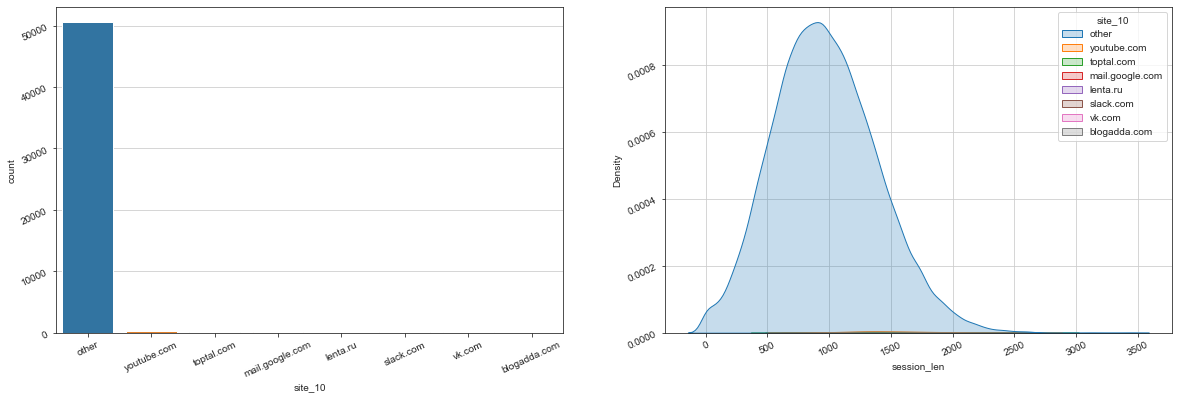

site_11 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


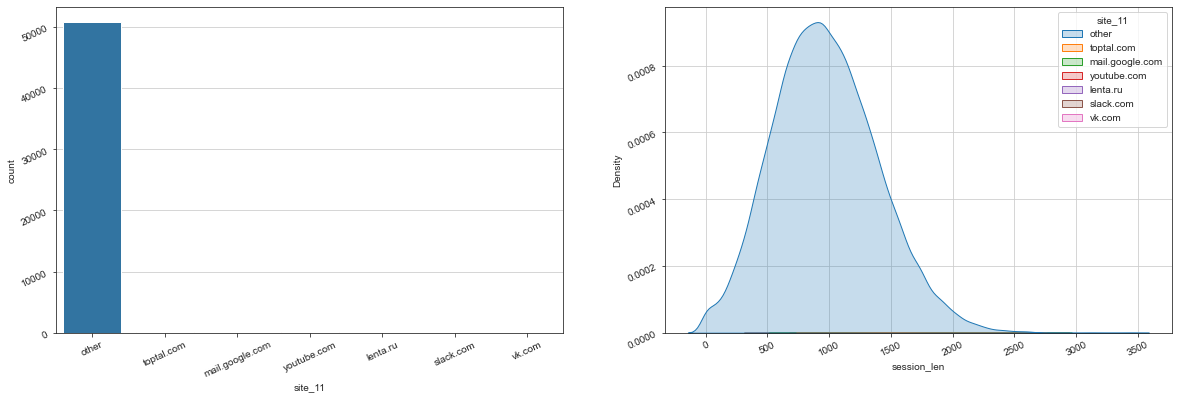

site_12 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


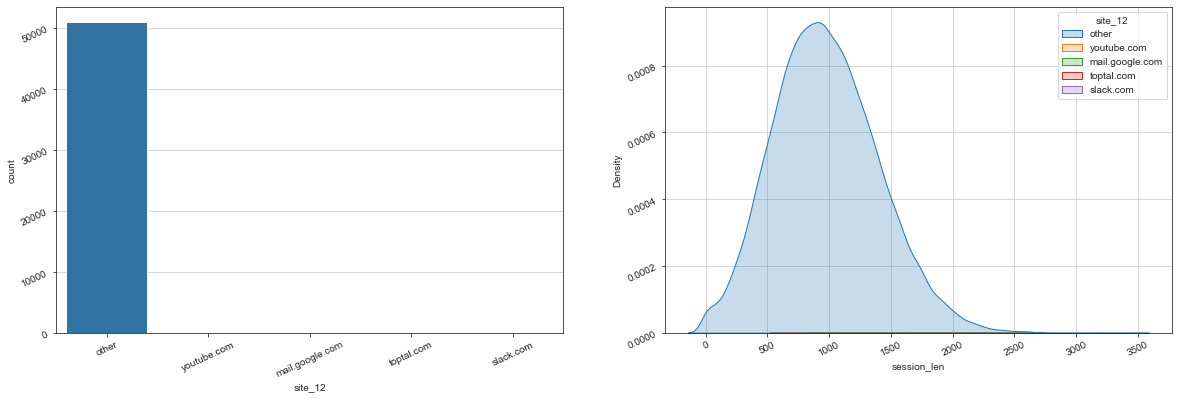

In [31]:
for col in cat_cols.drop("time"):
    categorial_feature_overview(col, 25, df)


In [32]:
df.to_csv("train_processed.csv", index=False)
